# Data Exploration

In [16]:
import pickle
import numpy as np
import PIL
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.utils import to_categorical,np_utils
import pandas as pd
from sklearn.model_selection import train_test_split


In [17]:
path = "../../data/"
num_classes = 4
batch_size = 256
epochs = 50
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [18]:
#loading the data from the pickle files
with open(path + 'train_image.pkl', 'rb') as f:
    X = np.array(pickle.load(f))

with open(path + 'train_label.pkl', 'rb') as f:
    y = np.array(pickle.load(f))

with open(path + 'test_image.pkl', 'rb') as f:
    X_submit = np.array(pickle.load(f))    

In [19]:
#Normalize data
X = X / 255
X_submit = X_submit / 255

#reshaping the flattened images to images of dimension (28,28,1)
X = np.reshape(X,(len(X),28,28,1))
X_test = np.reshape(X_submit,(len(X_submit),28,28,1))

In [20]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Unique labels:",unique_elements,"\nFrequency of each label",counts_elements)

Unique labels: [0 2 3 6] 
Frequency of each label [2000 2000 2000 2000]


In [21]:
#defining new labels so that the labels are successive integers
label_mapping = {0:0,2:1,3:2,6:3}

for x in label_mapping.keys():
    y = np.where(y==x, label_mapping[x], y)


In [22]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(unique_elements,counts_elements)

[0 1 2 3] [2000 2000 2000 2000]


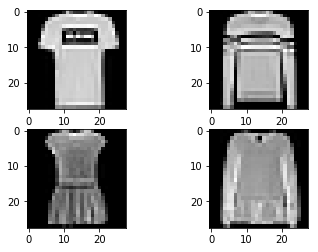

In [23]:
#Getting list of all four classes
type0 = np.where(y==0)[0][0]
type1 = np.where(y==1)[0][0]
type2 = np.where(y==2)[0][0]
type3 = np.where(y==3)[0][0]

#Displaying one sample of each class
plt.subplot(221)
plt.imshow(np.reshape(X[type0],(28,28)), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(np.reshape(X[type1],(28,28)), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(np.reshape(X[type2],(28,28)), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(np.reshape(X[type3],(28,28)), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [24]:
#converting to one hot encodings
y = to_categorical(np.array(y))
print(y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [26]:
X_train.shape,y_train.shape

((5120, 28, 28, 1), (5120, 4))

In [27]:
X[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078431],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.18823529],
        [0.16862745],
        [0.34117647],
        [0.65882353],
        [0.52156863],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215686],
        [0.53333333],
        [0.85882353],
        [0.84705882],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

# A Basic Model

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [30]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 5120 samples, validate on 1280 samples
Epoch 1/50
5120/5120 [==============================] - 5s 1ms/step - loss: 1.2217 - acc: 0.4488 - val_loss: 0.9672 - val_acc: 0.5687
Epoch 2/50
5120/5120 [==============================] - 5s 888us/step - loss: 0.9128 - acc: 0.6045 - val_loss: 0.7905 - val_acc: 0.6586
Epoch 3/50
5120/5120 [==============================] - 4s 877us/step - loss: 0.7822 - acc: 0.6514 - val_loss: 0.7256 - val_acc: 0.6945
Epoch 4/50
5120/5120 [==============================] - 5s 913us/step - loss: 0.7140 - acc: 0.6828 - val_loss: 0.6652 - val_acc: 0.7164
Epoch 5/50
5120/5120 [==============================] - 5s 882us/step - loss: 0.6821 - acc: 0.6941 - val_loss: 0.6570 - val_acc: 0.7242
Epoch 6/50
5120/5120 [==============================] - 5s 879us/step - loss: 0.6406 - acc: 0.7258 - val_loss: 0.6220 - val_acc: 0.7484
Epoch 7/50
5120/5120 [==============================] - 5s 889us/step - loss: 0.6050 - acc: 0.7443 - val_loss: 0.5805 - val_acc: 0.7672
Ep

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37477672919631005
Test accuracy: 0.866875


# Testing Data Augmentation

In [32]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip=True,)
train_datagen.fit(X_train)

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=1, save_best_only=True)

In [35]:
history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size),
              epochs=epochs,
              steps_per_epoch = len(X_train)//batch_size,  
          verbose=1,
          validation_data=(X_val, y_val),
                             callbacks=[checkpointer])

Epoch 1/50
20/20 [==============================] - 7s 362ms/step - loss: 1.1676 - acc: 0.4561 - val_loss: 0.8676 - val_acc: 0.6180

Epoch 00001: val_loss improved from inf to 0.86762, saving model to ./weights.hdf5
Epoch 2/50
20/20 [==============================] - 6s 312ms/step - loss: 0.8460 - acc: 0.6246 - val_loss: 0.7161 - val_acc: 0.6687

Epoch 00002: val_loss improved from 0.86762 to 0.71612, saving model to ./weights.hdf5
Epoch 3/50
20/20 [==============================] - 5s 238ms/step - loss: 0.7347 - acc: 0.6693 - val_loss: 0.6875 - val_acc: 0.6953

Epoch 00003: val_loss improved from 0.71612 to 0.68746, saving model to ./weights.hdf5
Epoch 4/50
20/20 [==============================] - 5s 233ms/step - loss: 0.6709 - acc: 0.7002 - val_loss: 0.6521 - val_acc: 0.7172

Epoch 00004: val_loss improved from 0.68746 to 0.65210, saving model to ./weights.hdf5
Epoch 5/50
20/20 [==============================] - 5s 228ms/step - loss: 0.6429 - acc: 0.7111 - val_loss: 0.5924 - val_acc:

20/20 [==============================] - 5s 266ms/step - loss: 0.3004 - acc: 0.8850 - val_loss: 0.3538 - val_acc: 0.8750

Epoch 00040: val_loss did not improve from 0.35341
Epoch 41/50
20/20 [==============================] - 5s 255ms/step - loss: 0.2908 - acc: 0.8832 - val_loss: 0.3556 - val_acc: 0.8695

Epoch 00041: val_loss did not improve from 0.35341
Epoch 42/50
20/20 [==============================] - 4s 200ms/step - loss: 0.2911 - acc: 0.8863 - val_loss: 0.3591 - val_acc: 0.8672

Epoch 00042: val_loss did not improve from 0.35341
Epoch 43/50
20/20 [==============================] - 4s 196ms/step - loss: 0.2973 - acc: 0.8799 - val_loss: 0.3620 - val_acc: 0.8680

Epoch 00043: val_loss did not improve from 0.35341
Epoch 44/50
20/20 [==============================] - 4s 197ms/step - loss: 0.2924 - acc: 0.8832 - val_loss: 0.3736 - val_acc: 0.8672

Epoch 00044: val_loss did not improve from 0.35341
Epoch 45/50
20/20 [==============================] - 4s 197ms/step - loss: 0.2738 - acc

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.357341883033514
Test accuracy: 0.86375
